# Analysis of Gut Microbiota data from ASD and typically developing individuals

---

In [109]:
import pandas as pd 
import numpy as np 

dfGut = pd.read_excel("/home/brenoslivio/Documents/git/GutMicrobiomeASDAnalysis/data/ZHOU_DAN_2020/16S_Sequencing/GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.xls")

dfGut

,OTU,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
0,OTU1,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,OTU2,d__Bacteria;_k__norank;_p__Proteobacteria;_c__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OTU3,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erys...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,OTU4,d__Bacteria;_k__norank;_p__Firmicutes;_c__Baci...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,OTU5,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mol...,0,0,1,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,OTU1334,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1318,OTU1335,d__Bacteria;_k__norank;_p__Actinobacteria;_c__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1319,OTU1336,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,OTU1337,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
dfGut['taxonomy']

0       d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
1       d__Bacteria;_k__norank;_p__Proteobacteria;_c__...
2       d__Bacteria;_k__norank;_p__Firmicutes;_c__Erys...
3       d__Bacteria;_k__norank;_p__Firmicutes;_c__Baci...
4       d__Bacteria;_k__norank;_p__Tenericutes;_c__Mol...
                              ...                        
1317    d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...
1318    d__Bacteria;_k__norank;_p__Actinobacteria;_c__...
1319    d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
1320    d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
1321    d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
Name: taxonomy, Length: 1322, dtype: object

In [111]:
s = dfGut['taxonomy'].str.split(r";", n=-1,expand=True)

dfTax = pd.concat([dfGut['OTU'], s], axis=1, ignore_index=True)

dfTax

,0,1,2,3,4,5,6,7,8
0,OTU1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Defluviitaleaceae,_g__Defluviitaleaceae_UCG-011,_s__Lachnospiraceae_bacterium_feline_oral_taxo...
1,OTU2,d__Bacteria,_k__norank,_p__Proteobacteria,_c__Alphaproteobacteria,_o__Sphingomonadales,_f__Sphingomonadaceae,_g__Sphingopyxis,_s__Sphingopyxis_granuli
2,OTU3,d__Bacteria,_k__norank,_p__Firmicutes,_c__Erysipelotrichia,_o__Erysipelotrichales,_f__Erysipelotrichaceae,_g__Faecalicoccus,_s__unclassified_g__Faecalicoccus
3,OTU4,d__Bacteria,_k__norank,_p__Firmicutes,_c__Bacilli,_o__Lactobacillales,_f__Streptococcaceae,_g__Streptococcus,_s__Streptococcus_anginosus_subsp._anginosus
4,OTU5,d__Bacteria,_k__norank,_p__Tenericutes,_c__Mollicutes,_o__Mollicutes_RF9,_f__norank_o__Mollicutes_RF9,_g__norank_o__Mollicutes_RF9,_s__uncultured_bacterium_g__norank_o__Mollicut...
...,...,...,...,...,...,...,...,...,...
1317,OTU1334,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__unclassified_g__Bacteroides
1318,OTU1335,d__Bacteria,_k__norank,_p__Actinobacteria,_c__Actinobacteria,_o__Coriobacteriales,_f__Coriobacteriaceae,_g__Parvibacter,_s__uncultured_bacterium_g__Parvibacter
1319,OTU1336,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcaceae_UCG-009,_s__uncultured_bacterium_g__Ruminococcaceae_UC...
1320,OTU1337,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Lachnospiraceae,_g__Catonella,_s__unclassified_g__Catonella


In [127]:
colNames = dfGut.iloc[:, 2:].columns

dfGutGroups = pd.concat([dfTax, dfGut.iloc[:, 2:]], axis=1, ignore_index=True)

cols = ['OTU', 'Domain', 'Kingdom', 'Phylium', 'Class', 'Order', 'Family', 'Genus', 'Species']
dfGutGroups.columns = cols + list(colNames)

dfGutGroups

,OTU,Domain,Kingdom,Phylium,Class,Order,Family,Genus,Species,A1,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
0,OTU1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Defluviitaleaceae,_g__Defluviitaleaceae_UCG-011,_s__Lachnospiraceae_bacterium_feline_oral_taxo...,0,...,0,0,0,0,0,0,0,0,0,0
1,OTU2,d__Bacteria,_k__norank,_p__Proteobacteria,_c__Alphaproteobacteria,_o__Sphingomonadales,_f__Sphingomonadaceae,_g__Sphingopyxis,_s__Sphingopyxis_granuli,0,...,0,0,0,0,0,0,0,0,0,0
2,OTU3,d__Bacteria,_k__norank,_p__Firmicutes,_c__Erysipelotrichia,_o__Erysipelotrichales,_f__Erysipelotrichaceae,_g__Faecalicoccus,_s__unclassified_g__Faecalicoccus,0,...,0,0,0,0,0,0,0,0,0,0
3,OTU4,d__Bacteria,_k__norank,_p__Firmicutes,_c__Bacilli,_o__Lactobacillales,_f__Streptococcaceae,_g__Streptococcus,_s__Streptococcus_anginosus_subsp._anginosus,0,...,0,0,0,0,0,0,0,0,1,0
4,OTU5,d__Bacteria,_k__norank,_p__Tenericutes,_c__Mollicutes,_o__Mollicutes_RF9,_f__norank_o__Mollicutes_RF9,_g__norank_o__Mollicutes_RF9,_s__uncultured_bacterium_g__norank_o__Mollicut...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,OTU1334,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__unclassified_g__Bacteroides,0,...,0,0,0,0,0,0,0,0,0,0
1318,OTU1335,d__Bacteria,_k__norank,_p__Actinobacteria,_c__Actinobacteria,_o__Coriobacteriales,_f__Coriobacteriaceae,_g__Parvibacter,_s__uncultured_bacterium_g__Parvibacter,0,...,0,0,0,0,0,0,0,0,0,0
1319,OTU1336,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcaceae_UCG-009,_s__uncultured_bacterium_g__Ruminococcaceae_UC...,0,...,0,0,0,0,0,0,0,0,0,0
1320,OTU1337,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Lachnospiraceae,_g__Catonella,_s__unclassified_g__Catonella,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
dfGutGroups.groupby('Phylium').sum()

,A1,A10,A100,A101,A102,A104,A105,A106,A108,A109,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
Phylium,,,,,,,,,,,,,,,,,,,,,
_p__Actinobacteria,60,2395,52,94,164,203,29,41,52,37,...,78,452,38,149,262,119,1580,45,41,74
_p__Bacteroidetes,11274,13878,14398,15643,17926,8234,17048,20328,16788,18489,...,16741,11356,16174,21704,20234,15140,18340,13202,15001,19034
_p__Chloroflexi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_p__Cyanobacteria,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_p__Deferribacteres,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_p__Deinococcus-Thermus,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
_p__Firmicutes,14023,14286,15865,14939,12679,17174,13874,10655,13472,12690,...,11268,17781,12438,8584,10292,12660,4667,17568,13087,11813
_p__Fusobacteria,37,1,100,8,28,13,3,49,16,2,...,5,15,845,28,3,10,0,4,1,7
_p__Gemmatimonadetes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


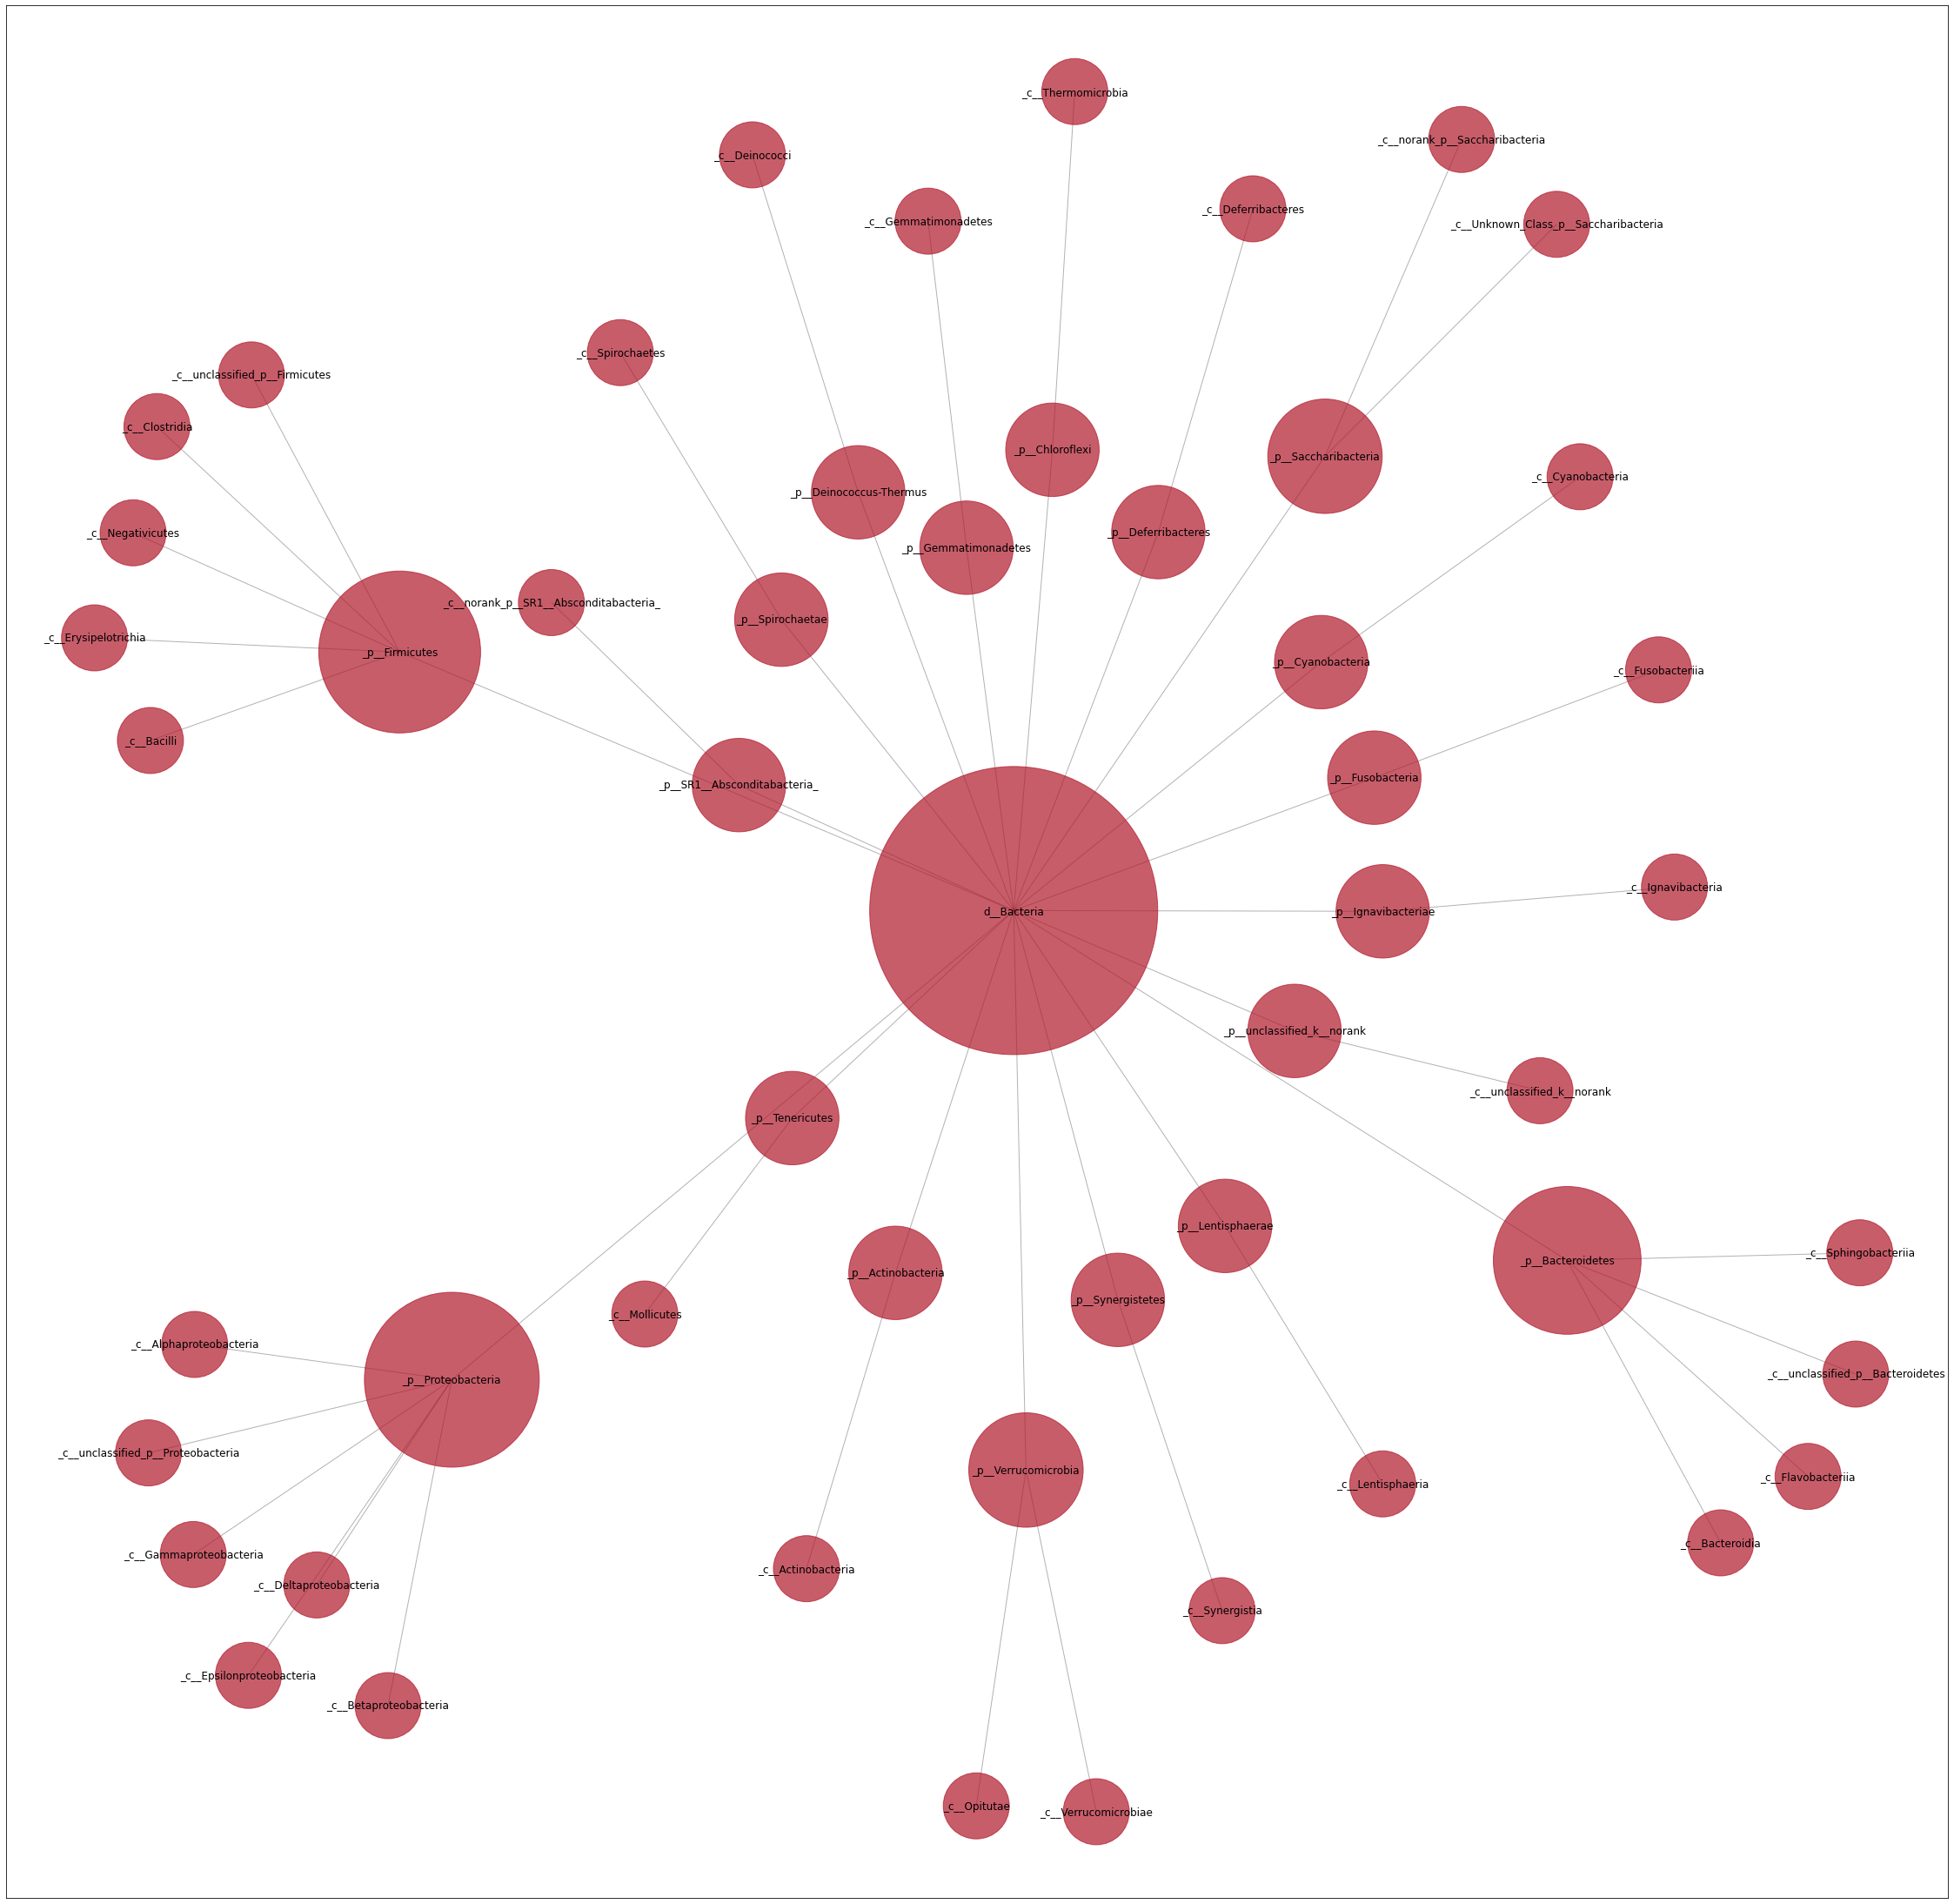

In [132]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize = [40, 40])

G = nx.Graph() 

for i in range(len(s[0])):
    G.add_edge(s[0][i], s[2][i])

for i in range(len(s[2])):
    G.add_edge(s[2][i], s[3][i])

#for i in range(len(s[3])):
#    G.add_edge(s[3][i], s[4][i])

#for i in range(len(s[4])):
#    G.add_edge(s[4][i], s[5][i])

pos = nx.spring_layout(G, seed = 1, k = 0.2)

nx.draw_networkx_labels(G, pos, font_color='k', font_family='IPAexGothic')

nx.draw_networkx_nodes(G, pos, alpha = 0.7, node_shape="o",
                        linewidths = 1,
                        node_color = np.array([plt.cm.RdBu(25)]),
                        #list(map(fnc_color, [nx.degree_centrality(G)[i]*20000 for i in G.nodes])),
                        node_size = [nx.degree_centrality(G)[i]*300000 for i in G.nodes])

nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.show()